In [47]:
from astropy.io import ascii
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

The "layouts/prod5_layouts/CTAS_ArrayElements_Position_corsika.txt" file contains (in corsika format, so east/north are swapped) each telescope position. The different CTA-S layout files contain a list of telescopes with names, so we need to correlate the telescope names with their positions.

This set of scripts export all layouts currently considered into the format used by the II library.

In [76]:
def extract_telescope_locations(layout_name, plot=False):
    reference_positions = ascii.read("layouts/prod5_layouts/CTAS_ArrayElements_Position_corsika.txt")
    tel_list = ascii.read("layouts/prod5_layouts/CTA.prod5S-{}-13MSTs40SSTs-MSTF.lis".format(layout_name))
    tel_name = []
    tel_x = []
    tel_y = []
    for tel in tel_list['col5']:
        if tel in reference_positions['telescope_name']:
            entry = reference_positions[np.where(tel == reference_positions['telescope_name'])]
            tel_name.append(tel)
            tel_x.append(entry['pos_x'])
            tel_y.append(entry['pos_y'])
    table = Table()
    table.meta['layout_name'] = layout_name
    table['telescope_name'] = tel_name
    table['telescope_name'] = tel_name
    table['pos_x'] = tel_y    
    table['pos_y'] = tel_x
    if plot:
        draw_array(table)
    return table

def draw_array(layout):
    lst_mask = ['L' in s for s in layout['telescope_name']]
    mst_mask = ['M' in s for s in layout['telescope_name']]
    sst_mask = ['S' in s for s in layout['telescope_name']]
    fig = plt.figure(figsize=[7,7])
    if np.sum(lst_mask) > 0:
        print("The layout contains {} LSTs".format(np.sum(lst_mask)))
        plt.plot(layout['pos_x'][lst_mask], layout['pos_y'][lst_mask], 'o', markersize=12, label="LSTs")
    if np.sum(mst_mask) > 0:
        print("The layout contains {} MSTs".format(np.sum(mst_mask)))
        plt.plot(layout['pos_x'][mst_mask], layout['pos_y'][mst_mask], 'o', markersize=8, label="MSTs")
    if np.sum(sst_mask) > 0:
        print("The layout contains {} SSTs".format(np.sum(sst_mask)))
        plt.plot(layout['pos_x'][sst_mask], layout['pos_y'][sst_mask], 's', markersize=8, label="SSTs")
    plt.legend()
    plt.xlim([-1500, 1500])
    plt.ylim([-1500, 1500])
    plt.xlabel('West -> East direction [m]')
    plt.ylabel('South -> North direction [m]')
    plt.title('CTA-S layout {}'.format(layout.meta['layout_name']))
    plt.show()


def write_array(layout):
    if not os.path.exists('layouts/{}'.format(layout.meta['layout_name'])):
        os.mkdir('layouts/{}'.format(layout.meta['layout_name']))

    lst_mask = ['L' in s for s in layout['telescope_name']]
    mst_mask = ['M' in s for s in layout['telescope_name']]
    sst_mask = ['S' in s for s in layout['telescope_name']]
    
    if np.sum(lst_mask) > 0:
        with open('layouts/{}/23m_telescope.csv'.format(layout.meta['layout_name']), 'w') as the_file:
            for entry in layout[lst_mask]:
                the_file.write('{:4.2f}, {:4.2f}\n'.format(entry['pos_x'][0], entry['pos_y'][0]))  
    if np.sum(mst_mask) > 0:
        with open('layouts/{}/12m_telescope.csv'.format(layout.meta['layout_name']), 'w') as the_file:
            for entry in layout[mst_mask]:
                the_file.write('{:4.2f}, {:4.2f}\n'.format(entry['pos_x'][0], entry['pos_y'][0])) 
    if np.sum(sst_mask) > 0:
        with open('layouts/{}/04m_telescope.csv'.format(layout.meta['layout_name']), 'w') as the_file:
            for entry in layout[sst_mask]:
                the_file.write('{:4.2f}, {:4.2f}\n'.format(entry['pos_x'][0], entry['pos_y'][0])) 
    print('The layout was written into the "layouts/{}" folder'.format(layout.meta['layout_name']))

In [77]:
def export_all_layouts():
    layouts = ['M5C3', 'M5C5', 'M5C5f', 'M5C5g', 'M5C5h', 'M5D1a', 'M5D1af', 'M5D1ag', 'M5D1ah']
    for layout_name in layouts:
        layout = extract_telescope_locations(layout_name, plot=True)
        write_array(layout)

The layout contains 13 MSTs
The layout contains 40 SSTs


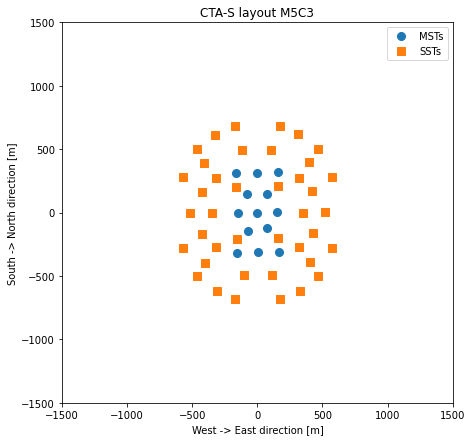

The layout was written into the "layouts/M5C3" folder
The layout contains 13 MSTs
The layout contains 40 SSTs


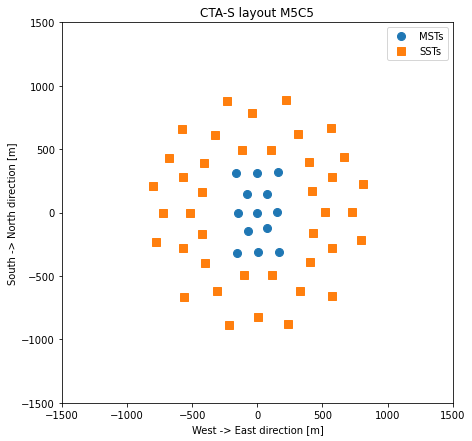

The layout was written into the "layouts/M5C5" folder
The layout contains 13 MSTs
The layout contains 40 SSTs


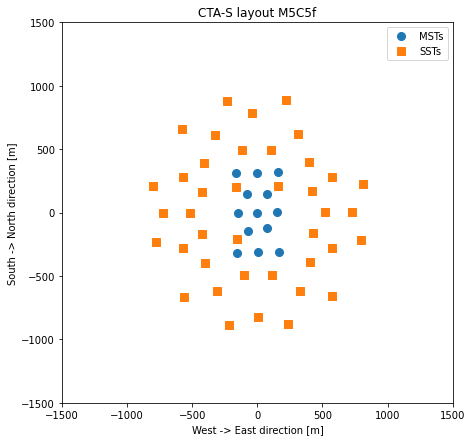

The layout was written into the "layouts/M5C5f" folder
The layout contains 13 MSTs
The layout contains 40 SSTs


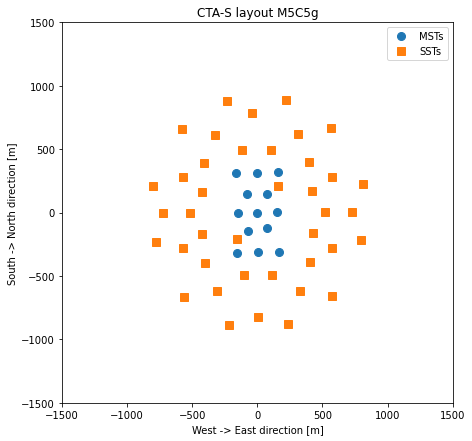

The layout was written into the "layouts/M5C5g" folder
The layout contains 13 MSTs
The layout contains 40 SSTs


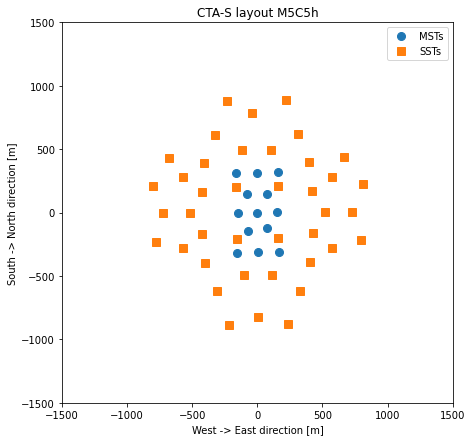

The layout was written into the "layouts/M5C5h" folder
The layout contains 13 MSTs
The layout contains 40 SSTs


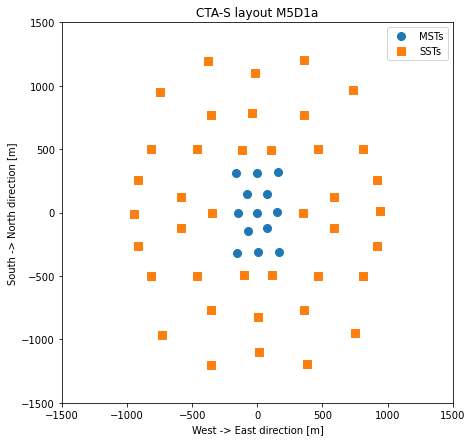

The layout was written into the "layouts/M5D1a" folder
The layout contains 13 MSTs
The layout contains 40 SSTs


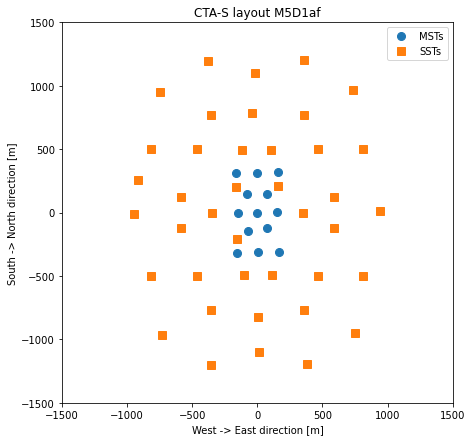

The layout was written into the "layouts/M5D1af" folder
The layout contains 13 MSTs
The layout contains 40 SSTs


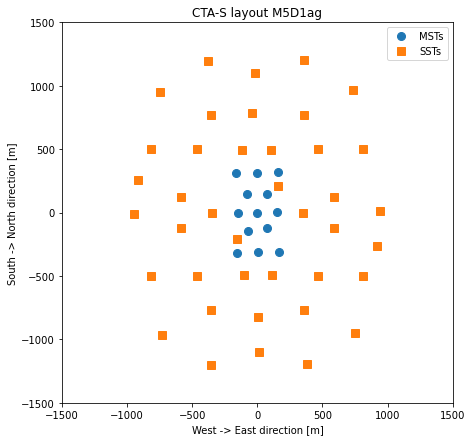

The layout was written into the "layouts/M5D1ag" folder
The layout contains 13 MSTs
The layout contains 40 SSTs


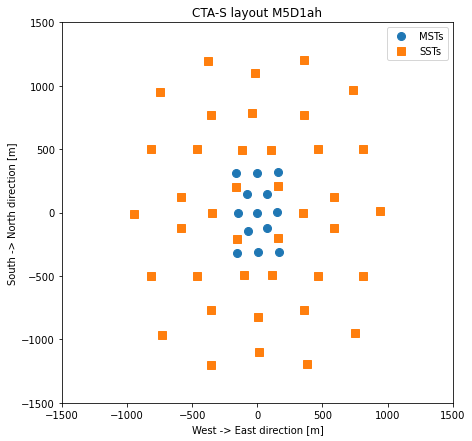

The layout was written into the "layouts/M5D1ah" folder


In [78]:
export_all_layouts()